In [1]:
# For google colab
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/H6751 Text & Web Mining Project/code

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/H6751 Text & Web Mining Project/code


In [2]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import re, string, unicodedata
import os
import time
import math
import numpy as np
import pandas as pd
import inflect
import matplotlib.pyplot as plt

import codecs
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.svm import SVC, SVR, LinearSVC
from sklearn.neural_network import MLPClassifier

np.random.seed(1234)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
## for data processing
def get_digit(s):
    return sum(c.isdigit() for c in s)

def pd_remove_url(data):
  no_row = len(data.index)
  for i, sen in enumerate(data, 0):
    data.iloc[i] = re.sub(r'https?:\/\/.*[\r\n]*', '', sen)
  return data

def pd_remove_stopwords(data):
    """Remove stop words from list of tokenized words"""
    stop_words = stopwords.words('english')
    for i, sen in enumerate(data, 0):
      new_sen = []
      for word in sen.split():
        if word not in stop_words:
            new_sen.append(word)
      data.iloc[i] = ' '.join(new_sen)
    return data

def pd_remove_punctuation(data):
    """Remove punctuation from list of tokenized words"""
    for i, sen in enumerate(data, 0):
      new_sen = []
      for word in sen.split():
        new_word = re.sub(r"\b[a-zA-Z]\b", '', word)
        new_word = re.sub(r'[^\w\s]', ' ', new_word)
        if new_word != '':
            new_sen.append(new_word)
      data.iloc[i] = ' '.join(new_sen)
    return data

#def pd_replace_contractions(data):
#    """Replace contractions in string of text"""
#    for i, sen in enumerate(data, 0):
#      data.iloc[i] = contractions.fix(sen)
#    return data

def pd_remove_non_ascii(data):
    """Remove non-ASCII characters from list of tokenized words"""
    for i, sen in enumerate(data, 0):
      new_sen = []
      for word in sen.split():
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_sen.append(new_word)
      data.iloc[i] = ' '.join(new_sen)
    return data

def pd_replace_numbers(data):
    """Replace all interger occurrences in list of tokenized words \
    with textual representation"""
    p = inflect.engine()
    for i, sen in enumerate(data, 0):
      new_sen = []
      for word in sen.split():
        if word.isdigit():
          new_word = p.number_to_words(word)
          new_sen.append(new_word)
        else:
          new_sen.append(word)
      data.iloc[i] = ' '.join(new_sen)
    return data

def pd_lemmatize_verbs(data):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    for i, sen in enumerate(data, 0):
      new_sen = []
      for word in sen.split():
        new_word = lemmatizer.lemmatize(word, pos='v')
        new_sen.append(new_word)
      data.iloc[i] = ' '.join(new_sen)
    return data

def pd_stem_text(data):
    stemmer= PorterStemmer()
    for i, sen in enumerate(data, 0):
      new_sen = []
      for word in sen.split():
        new_sen.append(stemmer.stem(word))
      data.iloc[i] = ' '.join(new_sen)
    return data
    


In [0]:
#========================================
# data loading
#========================================
#df = pd.read_csv("/Users/libbyzhang/Documents/PhD NTU/Text & Web Mining/In-Class Kaggle/train.csv")
#df_test=pd.read_csv("/Users/libbyzhang/Documents/PhD NTU/Text & Web Mining/In-Class Kaggle/test.csv")
df = pd.read_csv("../data/train.csv")
df_test = pd.read_csv("../data/test.csv")

0    4342
1    3271
Name: target, dtype: int64


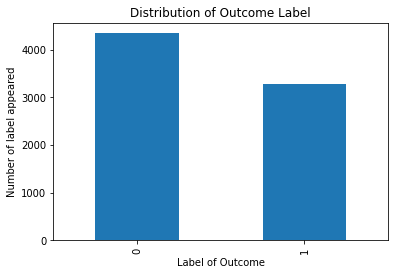

Show target=1 sample
   id  ... target
0   1  ...      1
1   4  ...      1
2   5  ...      1
3   6  ...      1
4   7  ...      1

[5 rows x 5 columns]
Show target=0 sample
    id keyword location                          text  target
15  23     NaN      NaN                What's up man?       0
16  24     NaN      NaN                 I love fruits       0
17  25     NaN      NaN              Summer is lovely       0
18  26     NaN      NaN             My car is so fast       0
19  28     NaN      NaN  What a goooooooaaaaaal!!!!!!       0
Examining shape
(7613,)
None


In [7]:
#========================================
# data examining
#========================================
# Plot number of label
pd.set_option('display.max_colwidth', None)
print(df['target'].value_counts())
df['target'].value_counts().plot(kind='bar')
plt.title("Distribution of Outcome Label")
plt.xlabel("Label of Outcome")
plt.ylabel("Number of label appeared")
plt.show()

# Show target=1 sample
print('Show target=1 sample')
print(df.loc[df.target==1].head(5))

# Show target=0 sample
print('Show target=0 sample')
print(df.loc[df.target==0].head(5))

# Examining shape
print('Examining shape')
print(df.text.shape)
test = df.text.dropna(inplace=True)
print(test)

In [0]:
# test spliting
target_column = 'target'
text_column = 'text'
test_size = 0.2

train_text, dev_text, y_train, y_dev = train_test_split(df[text_column], df[target_column], test_size=test_size, random_state=2568)
test_text = df_test[text_column]


#========================================
# data preprocessing
#========================================
remove_url = False
remove_non_ascii = False
lemmatize_verbs = False
remove_punctuation = False
remove_stopwords = False
replace_numbers = False
stem_text = False

if remove_url:
  train_text = pd_remove_url(train_text)
  dev_text = pd_remove_url(dev_text)
  test_text = pd_remove_url(test_text)

if remove_non_ascii:
  train_text = pd_remove_non_ascii(train_text)
  dev_text = pd_remove_non_ascii(dev_text)
  test_text = pd_remove_non_ascii(test_text)

if lemmatize_verbs:
  train_text = pd_lemmatize_verbs(train_text)
  dev_text = pd_lemmatize_verbs(dev_text)
  test_text = pd_lemmatize_verbs(test_text)

if remove_punctuation:
  train_text = pd_remove_punctuation(train_text)
  dev_text = pd_remove_punctuation(dev_text)
  test_text = pd_remove_punctuation(test_text)

if replace_numbers:
  train_text = pd_replace_numbers(train_text)
  dev_text = pd_replace_numbers(dev_text)
  test_text = pd_replace_numbers(test_text)

if remove_stopwords:
  train_text = pd_remove_stopwords(train_text)
  dev_text = pd_remove_stopwords(dev_text)
  test_text = pd_remove_stopwords(test_text)

if stem_text:
  train_text = pd_stem_text(train_text)
  dev_text = pd_stem_text(dev_text)
  test_text = pd_stem_text(test_text)


In [9]:
#=================================
# feature engineering
#=================================
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Normalizer
from nltk.tag import StanfordNERTagger

# stanford NER tagger
model = '/content/drive/My Drive/H6751 Text & Web Mining Project/ner/english.all.3class.distsim.crf.ser.gz'
jar = '/content/drive/My Drive/H6751 Text & Web Mining Project/ner/stanford-ner.jar'
ner_tagger = StanfordNERTagger(model, jar, encoding='utf8')

class TextStats(BaseEstimator, TransformerMixin):
    """Extract features from each document for DictVectorizer"""

    def fit(self, x, y=None):
        return self

    def transform(self, data):
        return [{'char_count': len(text),
                 'num_sentences': text.count('.'),
                 #'word_count': len(text.split()),
                 #'word_density': len(text) / (len(text.split())+1),
                 'punctuation_count': len("".join(_ for _ in text if _ in string.punctuation)),
                 'punc_density': len("".join(_ for _ in text if _ in string.punctuation)) / (len(text.split())+1),
                 'digit_count': get_digit(text),
                 #'loc_count': [x[1] for x in ner_tagger.tag(text.split())].count('LOCATION'),
                 'digit_density': get_digit(text) / (len(text.split())+1)
                 }
                for text in data]

                
# model preparation
def print_result(model,model_name,x_train,y_train,x_dev,y_dev):
    pipe2 = Pipeline([
    ('u1', FeatureUnion(
        transformer_list=[
        ('tfdif_features', Pipeline([
            ('tfidf', TfidfVectorizer(min_df = 5, max_df = 0.95,lowercase=True, ngram_range=(1,3))),
            #('tfidf', TfidfVectorizer(ngram_range=(1,6),analyzer='char', min_df=20)),
            ('tfidftrans', TfidfTransformer()),
        ])),
         ('textstats',  Pipeline([
            ('stats', TextStats()),  
            ('vect', DictVectorizer()), 
            ('norm', Normalizer())
            ])),
        ],
        transformer_weights={
            'tfdif_features': 1,
            'textstats': 0.15,
        },
    )),
    (model_name, model),
    ])
    print('------------------------------------------------------------')
    print("**",model_name,"**")
    %time pipe2.fit(x_train,y_train)
    y_pred = pipe2.predict(x_dev)
    y_true = y_dev
    print('accurary: ',accuracy_score(y_true, y_pred))
    print('f1-score: ',f1_score(y_true, y_pred))
    



/usr/local/lib/python3.6/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [10]:
#=================================
# Model building
#=================================
# Logistic Regression
logistic_reg = LogisticRegression(random_state=1, max_iter=1000)
print_result(logistic_reg, 'Logistic Regression-c1', train_text, y_train, dev_text, y_dev)

logistic_reg = LogisticRegression(random_state=1, max_iter=1000, C=3)
print_result(logistic_reg, 'Logistic Regression-c3', train_text, y_train, dev_text, y_dev)

logistic_reg = LogisticRegression(random_state=1, max_iter=1000, C=5)
print_result(logistic_reg, 'Logistic Regression-c5', train_text, y_train, dev_text, y_dev)

------------------------------------------------------------
** Logistic Regression-c1 **
CPU times: user 1.01 s, sys: 28.8 ms, total: 1.04 s
Wall time: 1.06 s
accurary:  0.8076165462902167
f1-score:  0.7572493786246893
------------------------------------------------------------
** Logistic Regression-c3 **
CPU times: user 1.02 s, sys: 4.94 ms, total: 1.03 s
Wall time: 1.02 s
accurary:  0.8095863427445831
f1-score:  0.768370607028754
------------------------------------------------------------
** Logistic Regression-c5 **
CPU times: user 1.02 s, sys: 8.26 ms, total: 1.03 s
Wall time: 1.03 s
accurary:  0.8017071569271176
f1-score:  0.7610759493670886


In [11]:
#=================================
# K-nearest neighbor
#=================================
knn = KNeighborsClassifier()
print_result(knn, 'KNN', train_text, y_train, dev_text, y_dev)

#=================================
# Naive Bayes
#=================================
mNB = MultinomialNB()
print_result(mNB, 'mNB',train_text, y_train, dev_text, y_dev)

#=================================
# Decision Tree 
#=================================
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = None)
print_result(dt, 'Decision Tree-mdnone', train_text, y_train, dev_text, y_dev)
print("max depth:", dt.tree_.max_depth)

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 10)
print_result(dt, 'Decision Tree-md10', train_text, y_train, dev_text, y_dev)

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 20)
print_result(dt, 'Decision Tree-md20', train_text, y_train, dev_text, y_dev)

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 50)
print_result(dt, 'Decision Tree-md30', train_text, y_train, dev_text, y_dev)

dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 30)
print_result(dt, 'Decision Tree-md30-en', train_text, y_train, dev_text, y_dev)

dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 50)
print_result(dt, 'Decision Tree-md50', train_text, y_train, dev_text, y_dev)


------------------------------------------------------------
** KNN **
CPU times: user 870 ms, sys: 12.6 ms, total: 882 ms
Wall time: 881 ms
accurary:  0.6572554169402495
f1-score:  0.3815165876777251
------------------------------------------------------------
** mNB **
CPU times: user 861 ms, sys: 9.22 ms, total: 870 ms
Wall time: 870 ms
accurary:  0.7997373604727511
f1-score:  0.7308031774051192
------------------------------------------------------------
** Decision Tree-mdnone **
CPU times: user 1.98 s, sys: 10.6 ms, total: 1.99 s
Wall time: 1.99 s
accurary:  0.6730137885751806
f1-score:  0.6232980332829048
max depth: 193
------------------------------------------------------------
** Decision Tree-md10 **
CPU times: user 1.06 s, sys: 12.6 ms, total: 1.07 s
Wall time: 1.07 s
accurary:  0.66973079448457
f1-score:  0.5790794979079498
------------------------------------------------------------
** Decision Tree-md20 **
CPU times: user 1.24 s, sys: 7.75 ms, total: 1.24 s
Wall time: 1.

In [0]:
#=================================
# Boosting Methods
#=================================
# Fit a AdaBoost model
adaboost = AdaBoostClassifier(n_estimators=100)
print_result(adaboost, 'AdaBoost', train_text, y_train, dev_text, y_dev)

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=150, learning_rate=1, max_depth=1, random_state=0)
print_result(gbc, 'Gradient Boosting Classifier', train_text, y_train, dev_text, y_dev)

# XGBoost
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 100,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 scale_pos_weight=1)
print_result(gbm, 'XGB', train_text, y_train, dev_text, y_dev)


------------------------------------------------------------
** RF **
CPU times: user 7.16 s, sys: 12.8 ms, total: 7.17 s
Wall time: 7.18 s
accurary:  0.7754432042022325
f1-score:  0.697879858657244
------------------------------------------------------------
** AdaBoost **
CPU times: user 2.3 s, sys: 27 ms, total: 2.32 s
Wall time: 2.32 s
accurary:  0.7774130006565988
f1-score:  0.7167919799498746
------------------------------------------------------------
** Gradient Boosting Classifier **
CPU times: user 2.54 s, sys: 18 ms, total: 2.56 s
Wall time: 2.56 s
accurary:  0.7715036112934996
f1-score:  0.7147540983606556
------------------------------------------------------------
** Extra Trees **
CPU times: user 12.4 s, sys: 13.9 ms, total: 12.4 s
Wall time: 12.4 s
accurary:  0.8036769533814839
f1-score:  0.7485281749369218
------------------------------------------------------------
** XGB **
CPU times: user 2.23 s, sys: 9.79 ms, total: 2.24 s
Wall time: 2.31 s
accurary:  0.74064346684

In [0]:
#=================================
# Ridge Classifier
#=================================
ridge = RidgeClassifier(random_state=1234)
print_result(ridge, 'Ridge Classifier', train_text, y_train, dev_text, y_dev)

ridge = RidgeClassifier(random_state=1234, alpha=10)
print_result(ridge, 'Ridge Classifier', train_text, y_train, dev_text, y_dev)

ridge = RidgeClassifier(random_state=1234, alpha=15)
print_result(ridge, 'Ridge Classifier', train_text, y_train, dev_text, y_dev)


------------------------------------------------------------
** Ridge Classifier **
CPU times: user 729 ms, sys: 11 ms, total: 740 ms
Wall time: 739 ms
accurary:  0.8082731451083388
f1-score:  0.768621236133122
------------------------------------------------------------
** Ridge Classifier **
CPU times: user 725 ms, sys: 5.99 ms, total: 731 ms
Wall time: 731 ms
accurary:  0.8108995403808273
f1-score:  0.7521514629948365
------------------------------------------------------------
** Ridge Classifier **
CPU times: user 725 ms, sys: 3.98 ms, total: 729 ms
Wall time: 728 ms
accurary:  0.8089297439264609
f1-score:  0.7422497785651019


In [0]:
#=================================
#Random Forest
#=================================
rf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
print_result(rf, 'RF-auto',train_text, y_train, dev_text, y_dev)

#rf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0, max_depth = 30)
#print_result(rf, 'RF-auto',train_text, y_train, dev_text, y_dev)

#rf = RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0, max_depth = 100)
#print_result(rf, 'RF-auto',train_text, y_train, dev_text, y_dev)

rf = RandomForestClassifier(n_estimators=100, max_features="sqrt",random_state=0)
print_result(rf, 'RF-sq',train_text, y_train, dev_text, y_dev)

rf = RandomForestClassifier(n_estimators=100, max_features=None,random_state=0)
print_result(rf, 'RF-no',train_text, y_train, dev_text, y_dev)

rf = RandomForestClassifier(n_estimators=100, max_features="log2",random_state=0)
print_result(rf, 'RF-100',train_text, y_train, dev_text, y_dev)

rf = RandomForestClassifier(n_estimators=200, max_features="log2",random_state=0)
print_result(rf, 'RF-200',train_text, y_train, dev_text, y_dev)

rf = RandomForestClassifier(n_estimators=50, max_features="log2",random_state=0)
print_result(rf, 'RF-50',train_text, y_train, dev_text, y_dev)


------------------------------------------------------------
** RF-auto **
CPU times: user 7.1 s, sys: 4.89 ms, total: 7.11 s
Wall time: 7.11 s
accurary:  0.7754432042022325
f1-score:  0.697879858657244
------------------------------------------------------------
** RF-log **
CPU times: user 6.96 s, sys: 4.96 ms, total: 6.96 s
Wall time: 6.96 s
accurary:  0.7852921864740644
f1-score:  0.7088156723063224
------------------------------------------------------------
** RF-200 **
CPU times: user 13.2 s, sys: 2.77 ms, total: 13.2 s
Wall time: 13.2 s
accurary:  0.7846355876559422
f1-score:  0.703971119133574
------------------------------------------------------------
** RF-50 **
CPU times: user 13.3 s, sys: 3.65 ms, total: 13.3 s
Wall time: 13.3 s
accurary:  0.7846355876559422
f1-score:  0.703971119133574


In [0]:
#=================================
# Extremely Randomised Trees
#=================================
et = ExtraTreesClassifier(n_estimators=100, max_depth=50, min_samples_split=2, random_state=0)
print_result(et, 'Extra Trees-50', train_text, y_train, dev_text, y_dev)

et = ExtraTreesClassifier(n_estimators=100, max_depth=100, max_features="sqrt", min_samples_split=2, random_state=0)
print_result(et, 'Extra Trees-100', train_text, y_train, dev_text, y_dev)

et = ExtraTreesClassifier(n_estimators=100, max_depth=None, max_features="sqrt", min_samples_split=2, random_state=0)
print_result(et, 'Extra Trees-none', train_text, y_train, dev_text, y_dev)

et = ExtraTreesClassifier(n_estimators=100, max_depth=None, max_features="log2",min_samples_split=2, random_state=0)
print_result(et, 'Extra Trees-log100', train_text, y_train, dev_text, y_dev)

et = ExtraTreesClassifier(n_estimators=50, max_depth=None, max_features="log2",min_samples_split=2, random_state=0)
print_result(et, 'Extra Trees-log50', train_text, y_train, dev_text, y_dev)

et = ExtraTreesClassifier(n_estimators=200, max_depth=None, max_features="log2",min_samples_split=2, random_state=0)
print_result(et, 'Extra Trees-log200', train_text, y_train, dev_text, y_dev)

------------------------------------------------------------
** Extra Trees **
CPU times: user 2.06 s, sys: 8.74 ms, total: 2.06 s
Wall time: 2.06 s
accurary:  0.7340774786605384
f1-score:  0.5741324921135647
------------------------------------------------------------
** Extra Trees **
CPU times: user 4.24 s, sys: 9.47 ms, total: 4.25 s
Wall time: 4.25 s
accurary:  0.7806959947472094
f1-score:  0.6878504672897197
------------------------------------------------------------
** Extra Trees **
CPU times: user 12.5 s, sys: 14.9 ms, total: 12.5 s
Wall time: 12.5 s
accurary:  0.8036769533814839
f1-score:  0.7485281749369218
------------------------------------------------------------
** Extra Trees **
CPU times: user 12.2 s, sys: 4.22 ms, total: 12.2 s
Wall time: 12.2 s
accurary:  0.8076165462902167
f1-score:  0.7458803122289679
------------------------------------------------------------
** Extra Trees **
CPU times: user 6.48 s, sys: 10.9 ms, total: 6.49 s
Wall time: 6.49 s
accurary:  0.80

In [0]:
#=================================
# SGD
#=================================
sgd = SGDClassifier(random_state=1234, loss='log')
print_result(sgd, 'SGD Classifier-log', train_text, y_train, dev_text, y_dev)

sgd = SGDClassifier(random_state=1234, loss='modified_huber')
print_result(sgd, 'SGD Classifier-modi', train_text, y_train, dev_text, y_dev)

sgd = SGDClassifier(random_state=1234, loss='squared_hinge')
print_result(sgd, 'SGD Classifier-sq', train_text, y_train, dev_text, y_dev)

sgd = SGDClassifier(random_state=1234, loss='perceptron')
print_result(sgd, 'SGD Classifier-percep', train_text, y_train, dev_text, y_dev)

sgd = SGDClassifier(random_state=1234, loss='hinge')
print_result(sgd, 'SGD Classifier-hing', train_text, y_train, dev_text, y_dev)

#‘l2’, ‘l1’, ‘elasticnet’
#sgd = SGDClassifier(random_state=1234, loss='log', penalty = 'l1')
#print_result(sgd, 'SGD Classifier-logl1', train_text, y_train, dev_text, y_dev)
#sgd = SGDClassifier(random_state=1234, loss='log', penalty = 'elasticnet')
#print_result(sgd, 'SGD Classifier-logela', train_text, y_train, dev_text, y_dev)

------------------------------------------------------------
** SGD Classifier-log **
CPU times: user 717 ms, sys: 3.98 ms, total: 721 ms
Wall time: 719 ms
accurary:  0.8056467498358503
f1-score:  0.7597402597402598
------------------------------------------------------------
** SGD Classifier-modi **
CPU times: user 705 ms, sys: 3.98 ms, total: 709 ms
Wall time: 709 ms
accurary:  0.783322390019698
f1-score:  0.7469325153374233
------------------------------------------------------------
** SGD Classifier-sq **


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


CPU times: user 1.25 s, sys: 4.94 ms, total: 1.25 s
Wall time: 1.25 s
accurary:  0.7005909389363099
f1-score:  0.6082474226804124
------------------------------------------------------------
** SGD Classifier-percep **
CPU times: user 713 ms, sys: 8.03 ms, total: 721 ms
Wall time: 720 ms
accurary:  0.7367038739330269
f1-score:  0.6987227648384673
------------------------------------------------------------
** SGD Classifier-hing **
CPU times: user 717 ms, sys: 3.96 ms, total: 721 ms
Wall time: 720 ms
accurary:  0.8017071569271176
f1-score:  0.759170653907496


In [0]:
#=================================
# SVM
#=================================
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC

svm = SVC(random_state=1234)
print_result(svm, 'SVM-rbf',train_text, y_train, dev_text, y_dev)

svm = SVC(random_state=1234, kernel='linear')
print_result(svm, 'SVM-lin',train_text, y_train, dev_text, y_dev)

svm = SVC(random_state=1234, kernel='sigmoid')
print_result(svm, 'SVM-sigmoid',train_text, y_train, dev_text, y_dev)

svm = SVC(random_state=1234, kernel='poly')
print_result(svm, 'SVM-poly',train_text, y_train, dev_text, y_dev)

svm = LinearSVC(random_state=1234)
print_result(svm, 'Lin-SVM',train_text, y_train, dev_text, y_dev)

svm = NuSVC(random_state=1234)
print_result(svm, 'NuSVM',train_text, y_train, dev_text, y_dev)

------------------------------------------------------------
** SVM-rbf **
CPU times: user 7.04 s, sys: 20.7 ms, total: 7.06 s
Wall time: 7.06 s
accurary:  0.8089297439264609
f1-score:  0.7556675062972292
------------------------------------------------------------
** SVM-lin **
CPU times: user 5.02 s, sys: 12.8 ms, total: 5.04 s
Wall time: 5.04 s
accurary:  0.8115561391989494
f1-score:  0.7683615819209039
------------------------------------------------------------
** SVM-sigmoid **
CPU times: user 5.18 s, sys: 9.8 ms, total: 5.19 s
Wall time: 5.19 s
accurary:  0.8089297439264609
f1-score:  0.7620605069501227
------------------------------------------------------------
** SVM-poly **
CPU times: user 6.92 s, sys: 17.8 ms, total: 6.93 s
Wall time: 6.93 s
accurary:  0.7202889034799738
f1-score:  0.5571725571725572


In [0]:
#=================================
# Voting System
#=================================

from sklearn.ensemble import VotingClassifier

# voting estimators
et = ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)
svm = SVC(random_state=1, kernel='linear', probability=True)
logit = LogisticRegression(random_state=1, max_iter=10000, C=3)
adaboost = AdaBoostClassifier(n_estimators=100)
rf=RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)
mNB = MultinomialNB()

# fit voting
eclf = VotingClassifier(estimators=[('et', et), ('svm', svm),('logit', logit), ('rf', rf),('adboost',adaboost),('nb', mNB)], voting='hard')
print_result(eclf, 'Voting Classifier-hard', train_text, y_train, dev_text, y_dev)

eclf = VotingClassifier(estimators=[('et', et), ('svm', svm),('logit', logit),('adaboost',adaboost),('nb', mNB)], voting='hard')
print_result(eclf, 'Voting Classifier-hard', train_text, y_train, dev_text, y_dev)

eclf = VotingClassifier(estimators=[('et', et), ('svm', svm),('logit', logit),('adaboost',adaboost),('nb', mNB)], voting='soft', weights=[2,3,2,1,1])
print_result(eclf, 'Voting Classifier-soft', train_text, y_train, dev_text, y_dev)


------------------------------------------------------------
** Voting Classifier-hard **
CPU times: user 42.2 s, sys: 53.7 ms, total: 42.3 s
Wall time: 42.3 s
accurary:  0.8115561391989494
f1-score:  0.747136563876652
------------------------------------------------------------
** Voting Classifier-hard **
CPU times: user 35.8 s, sys: 48.8 ms, total: 35.9 s
Wall time: 35.9 s
accurary:  0.8174655285620486
f1-score:  0.7683333333333334
------------------------------------------------------------
** Voting Classifier-soft **
CPU times: user 35.9 s, sys: 37.8 ms, total: 35.9 s
Wall time: 35.9 s
accurary:  0.8102429415627052
f1-score:  0.7621399176954733


In [0]:
#=================================
# Stacking Methods
#=================================
estimators = [
  ('adaboost', adaboost),
  ('et', ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)),
  ('svm', SVC(random_state=1234)),
  ('mNB',mNB),
  ('rf',RandomForestClassifier(n_estimators=100, max_features="auto",random_state=0)),
  ('ridge', RidgeClassifier(random_state=1234, alpha=2)),
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1, max_iter=10000,C=2))
print_result(stack_clf, 'Stacking Classifier', train_text, y_train, dev_text, y_dev)

------------------------------------------------------------
** Stacking Classifier **
CPU times: user 2min 5s, sys: 350 ms, total: 2min 5s
Wall time: 2min 5s
accurary:  0.8095863427445831
f1-score:  0.7603305785123967


In [0]:
#=================================
# Stacking Methods
#=================================
estimators = [
  ('adaboost', adaboost),
  ('et', ExtraTreesClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=0)),
  ('svm', SVC(random_state=1234)),
  ('mNB',mNB),
  ('ridge', RidgeClassifier(random_state=1234, alpha=2)),
]

stack_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=1, max_iter=10000,C=2))
print_result(stack_clf, 'Stacking Classifier', train_text, y_train, dev_text, y_dev)

------------------------------------------------------------
** Stacking Classifier **
CPU times: user 1min 37s, sys: 233 ms, total: 1min 37s
Wall time: 1min 37s
accurary:  0.8174655285620486
f1-score:  0.7698675496688742
